# Pakiety

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [2]:
r"""
COLOR = 'white'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['font.size'] = 14"""

"\nCOLOR = 'white'\nmatplotlib.rcParams['text.color'] = COLOR\nmatplotlib.rcParams['axes.labelcolor'] = COLOR\nmatplotlib.rcParams['xtick.color'] = COLOR\nmatplotlib.rcParams['ytick.color'] = COLOR\nmatplotlib.rcParams['figure.figsize'] = (10, 6)\nmatplotlib.rcParams['font.size'] = 14"

# Boston - EDA

In [3]:
# wczytywanie danych
# tak jak w lab_01
boston_dict = load_boston()
boston_df = pd.DataFrame(boston_dict['data'], columns=boston_dict['feature_names'])
boston_df['MEDV'] = boston_dict['target']

# zawsze na początku patrzymy na "głowę" df
# to taki odruch bezwarunkowy \:)
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Metody .info() i .describe() to również nasi przyjaciele

In [4]:
boston_df.info()
# nie ma braków, tylko dane numeryczne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Zobaczmy rozkłady poszczególnych zmiennych
Pomimo, że wszystkie zmienne są typu *float*, to nadal możemy mieć zmienne dyskretne/kategoryczne  
Można to sprwadzić przy użyciu metody *value_counts()* oraz **opisu danych**  
W tym przypadku, poza CHAS nie ma takiej sytuacji

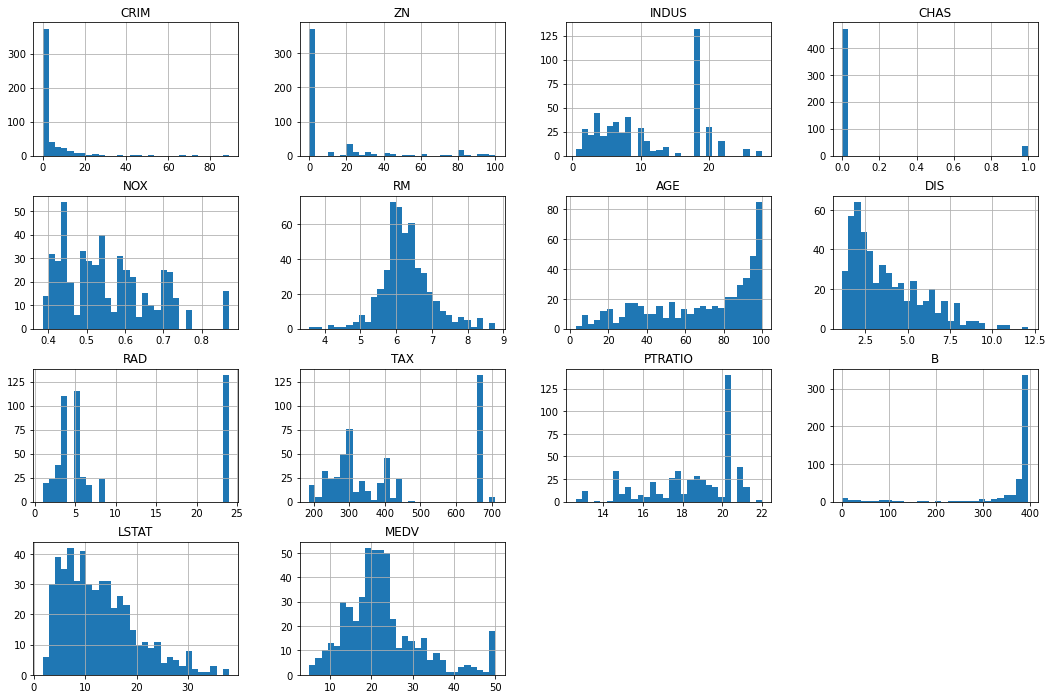

In [6]:
#boston_df.hist(figsize=(25, 12), bins=40)
boston_df.hist(figsize=(18, 12), bins=30)
plt.show()

In [7]:
# tu występuje dość mało wartośći, ale to nie jest zmienna kategoryczna
boston_df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

### Uwaga! Z naszą zmienną targetową jest pewien problem

In [8]:
boston_df['MEDV'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

Zmienna MEDV została *zczapkowana* (*ang. capped*) - ucięta na wartości 50.0

# Przegląd wizualizacji

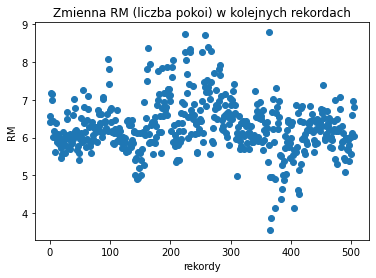

In [9]:
plt.plot(boston_df['RM'], 'o')
plt.title('Zmienna RM (liczba pokoi) w kolejnych rekordach')
plt.xlabel('rekordy')
plt.ylabel('RM')
plt.show()

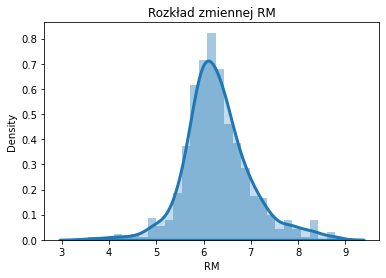

In [10]:
plot_dens=sns.distplot(boston_df['RM'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plot_dens.set_title('Rozkład zmiennej RM')
plt.show()

mediana = 6.2085
średnia = 6.284634387351787
Q1 = 5.8854999999999995 Q3 = 6.6235


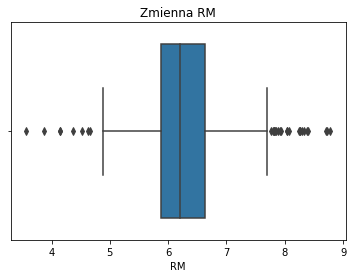

In [11]:
box_plot = sns.boxplot(boston_df['RM'])
box_plot.set_title('Zmienna RM')

print('mediana = %s' % np.median(boston_df['RM']))
print('średnia = %s' % np.mean(boston_df['RM']))
print('Q1 = %s' %np.percentile(boston_df['RM'], 25),'Q3 = %s' %np.percentile(boston_df['RM'], 75))

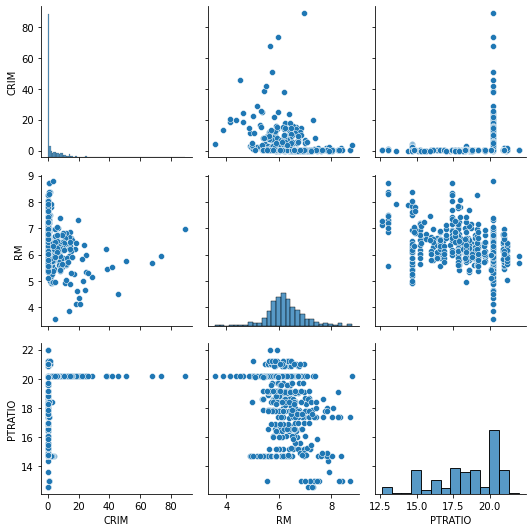

In [12]:
sns.pairplot(boston_df.iloc[:,[0,5,10]])
plt.tight_layout()

# tak naprawdę wystarczyłoby narysowanie tylko części wykresów
# czy jest koleracja zmiennych?

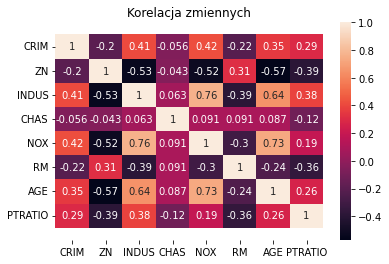

In [13]:
corr=boston_df.iloc[:,np.r_[0:7,10]].corr()
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)

# below is a workaround for matrix truncation
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()

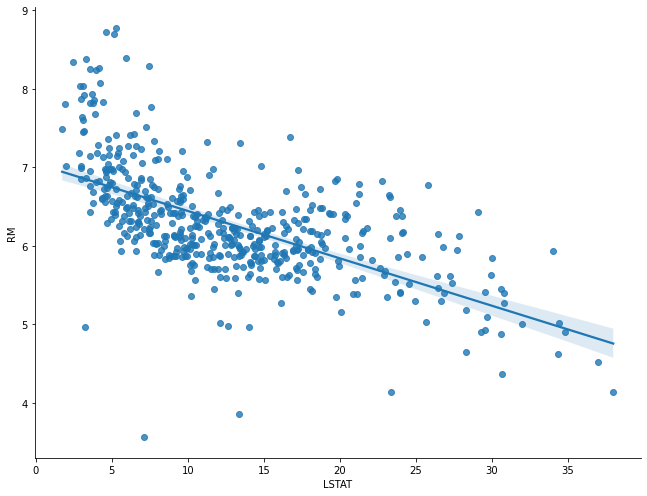

In [14]:
sns.lmplot( x='LSTAT', y='RM', data=boston_df, size=7, aspect=1.3)
plt.show()
#fit_reg=False, # No regression line
#dodaje automatycznie prostą regresji